In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [645]:
df = pd.read_csv("Thanawya(2).csv")

In [646]:
df.columns = df.columns.str.strip()

In [647]:
df.describe()

,رقم_الجلوس,مجموع_الدرجات
count,2882,2882
mean,806990.23351839,315.7017696044414
std,861.7377855545474,41.16498969508767
min,805500,32
25%,806240.25,290
50%,806994.5,322.5
75%,807735.75,345.5
max,808499,396.5


#### عدد طلاب الثانوية العامة ببورسعيد = 2882
#### متوسط درجات الطلاب = 315.7
#### 32 اقل درجة حصل عليها الطالب آدم سعيد محمد على سعيد 
#### الطالب الاول على المحافظة الطالب يوسف ياسر محمد عبدالحميد حمايل 396.5



In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   رقم_الجلوس               2882 non-null   int64  
 1   الأسم                    2882 non-null   object 
 2   المدرسة                  2882 non-null   object 
 3   الأدارة_التعليمية        2882 non-null   object 
 4   حالة_الطالب              2882 non-null   object 
 5   الشعبة                   2882 non-null   object 
 6   اللغة_العربية            2882 non-null   object 
 7   اللغة_الأجنبية_الأولى    2882 non-null   object 
 8   اللغة_الأجنبية_الثانية   2882 non-null   object 
 9   الرياضيات_البحتة         2882 non-null   object 
 10  التاريخ                  2882 non-null   object 
 11  الجغرافيا                2882 non-null   object 
 12  الفلسفة_والمنطق          2882 non-null   object 
 13  علم_النفس_والاجتماع      2882 non-null   object 
 14  الكيمياء                

In [649]:
df.columns

Index(['رقم_الجلوس', 'الأسم', 'المدرسة', 'الأدارة_التعليمية', 'حالة_الطالب',
       'الشعبة', 'اللغة_العربية', 'اللغة_الأجنبية_الأولى',
       'اللغة_الأجنبية_الثانية', 'الرياضيات_البحتة', 'التاريخ', 'الجغرافيا',
       'الفلسفة_والمنطق', 'علم_النفس_والاجتماع', 'الكيمياء', 'الأحياء',
       'الجيولوجيا_وعلوم_البيئة', 'الرياضيات_التطبيقية', 'الفيزياء',
       'مجموع_الدرجات'],
      dtype='object')

In [650]:
# عدد الطلاب بالحالة 
df.columns = df.columns.str.strip()

new = df["حالة_الطالب"].value_counts()
new

حالة_الطالب
ناجح        2811
دور ثاني      56
راسب          15
Name: count, dtype: int64

In [651]:
new = df["المدرسة"].unique()
new

array(['الشهيد احمد سامى الثانويه بنين', 'القناة الثانوية بنين',
       '6 اكتوبر الثانوية', 'علم الدين الثانوية بنات',
       'شهداء بورسعيد الثانوية المشتركة',
       'المهندس على سليمان الثانوية بنين',
       'الغرفة التجارية الثانوية للبنات',
       'الفيروز الحديثه ( عربي ) ثانوي', 'الرساله الحديثة لغات ثانوى',
       'بور سعيد الثانوية بنين العسكرية', 'بورسعيد الثانوية بنات',
       'العصفورى الثانوية الخاصة عربي بنين',
       'العصفورى الثانوية للمتفوقين المشتركه عربي'], dtype=object)

In [652]:
# عدد الطلاب 
all = df["حالة_الطالب"].value_counts().sum()
all

2882

In [653]:
# عدد الدور التاني 
round_2 = df[df["حالة_الطالب"] == "دور ثاني"].value_counts().sum()
round_2

56

In [654]:
# عدد الناجحين
success = df[df["حالة_الطالب"] == "ناجح"].value_counts().sum()
success

2811

In [655]:
# عدد الراسبين
failed = df[df["حالة_الطالب"] == "راسب"].value_counts().sum()
failed

15

In [656]:
# نسبة الرسوب
percentage_failed = failed / all
print(f"Percentage of failed students : {(percentage_failed *100):.2f}%")

Percentage of failed students : 0.52%


In [657]:
# نسبة النجاح
percentage_success = success / all
print(f"Percentage of Successful students : {(percentage_success *100):.2f}%")

Percentage of Successful students : 97.54%


In [658]:
# نسبة الدور التاني
percentage_round_2 = round_2 / all
print(f"Percentage of extension students : {(percentage_round_2 *100):.2f}%")

Percentage of extension students : 1.94%


In [659]:
# نسبه الطلاب بكل شعبة بالنسبة لمجموعهم 

elmy_olom = df[df["الشعبة"] == "علمي علوم"].value_counts().sum()
adaby = df[df["الشعبة"] == "أدبي"].value_counts().sum()
elmy_ryada = df[df["الشعبة"] == "علمي رياضة"].value_counts().sum()

all_sho3ba = df["الشعبة"].value_counts().sum()

percentage_elmy_olom = elmy_olom / all_sho3ba
print(f"Percentage of 3lmy_3lom students : {(percentage_elmy_olom *100):.2f}%")

percentage_adaby = adaby / all_sho3ba
print(f"Percentage of Adaby students : {(percentage_adaby *100):.2f}%")

percentage_elmy_ryada = elmy_ryada / all_sho3ba
print(f"Percentage of 3lmy_reyada students : {(percentage_elmy_ryada *100):.2f}%")

Percentage of 3lmy_3lom students : 55.90%
Percentage of Adaby students : 26.06%
Percentage of 3lmy_reyada students : 18.04%


In [660]:
elmy_olom_success = (
    df[(df["الشعبة"] == "علمي علوم") & (df["حالة_الطالب"] == "ناجح")]
    .value_counts()
    .sum()
)

elmy_olom_round_2 = (
    df[(df["الشعبة"] == "علمي علوم") & (df["حالة_الطالب"] == "دور تاني")]
    .value_counts()
    .sum()
)

elmy_olom_failed = (
    df[(df["الشعبة"] == "علمي علوم") & (df["حالة_الطالب"] == "راسب")]
    .value_counts()
    .sum()
)

In [661]:
elmy_ryada_success = (
    df[(df["الشعبة"] == "علمي رياضة") & (df["حالة_الطالب"] == "ناجح")]
    .value_counts()
    .sum()
)

elmy_ryada_round_2 = (
    df[(df["الشعبة"] == "علمي رياضة") & (df["حالة_الطالب"] == "دور تاني")]
    .value_counts()
    .sum()
)

elmy_ryada_failed = (
    df[(df["الشعبة"] == "علمي رياضة") & (df["حالة_الطالب"] == "راسب")]
    .value_counts()
    .sum()
)

In [662]:
adaby_success = (
    df[(df["الشعبة"] == "أدبي") & (df["حالة_الطالب"] == "ناجح")].value_counts().sum()
)

adaby_round_2 = (
    df[(df["الشعبة"] == "أدبي") & (df["حالة_الطالب"] == "دور تاني")]
    .value_counts()
    .sum()
)

adaby_failed = (
    df[(df["الشعبة"] == "أدبي") & (df["حالة_الطالب"] == "راسب")].value_counts().sum()
)

In [663]:
# نسبة نجاح ادبي 
percentage_adaby_success = adaby_success / adaby
print(
    f"Percentage of success of Adaby students : {(percentage_adaby_success *100):.2f}%"
)

Percentage of success of Adaby students : 98.14%


In [664]:
# نسبة نجاح علمي رياضة 
percentage_reyada_success = elmy_ryada_success / elmy_ryada
print(
    f"Percentage of success of 3lmy Reyada students : {(percentage_reyada_success *100):.2f}%"
)

Percentage of success of 3lmy Reyada students : 98.08%


In [665]:
# نسبة نجاح علمي علوم
percentage_3lom_success = elmy_olom_success / elmy_olom
print(
    f"Percentage of success of 3lmy 3lom students : {(percentage_3lom_success *100):.2f}%"
)

Percentage of success of 3lmy 3lom students : 97.08%


In [666]:
# df[['حالة_الطالب' , 'الشعبة']].value_counts()

In [667]:
def format_number(x):
    if x == int(x):
        return str(int(x))
    else:
        return str(x)

In [668]:
pd.set_option("display.float_format", "{:,.1f}".format)

In [669]:
pd.set_option("display.float_format", lambda x: format_number(x))

In [670]:
Subjects = [
    "اللغة_العربية",
    "اللغة_الأجنبية_الأولى",
    "اللغة_الأجنبية_الثانية",
    "الرياضيات_البحتة",
    "التاريخ",
    "الجغرافيا",
    "الفلسفة_والمنطق",
    "علم_النفس_والاجتماع",
    "الكيمياء",
    "الأحياء",
    "الجيولوجيا_وعلوم_البيئة",
    "الرياضيات_التطبيقية",
    "الفيزياء",
]

In [671]:
top_10_results = {}
for column in Subjects:

    df[column] = pd.to_numeric(df[column], errors="coerce")

    top_10 = df.nlargest(10, column)

    top_10_table = top_10[["الأسم", column]].reset_index(drop=True)
    top_10_table.index = top_10_table.index + 1

    top_10_table[column] = top_10_table[column].apply(format_number)
    top_10_table[column] = top_10_table[column]

    top_10_results[column] = top_10_table

In [672]:
for column, result in top_10_results.items():
    print(f"\nأعلى 10 طلاب في مادة {column}:")
    display(result)


أعلى 10 طلاب في مادة اللغة_العربية:


,الأسم,اللغة_العربية
1,ملك مروان محمد محمد العاطفى,79.5
2,سيف اشرف محمد عمار مهران,79
3,سيف مدحت سمير محمد علي خضير,79
4,عمار عطيه صلاح عطيه عطيه الخولى,79
5,ملك محمد شعبان محمد الدالى,78
6,يمنى محمد محمود محمد الديوى,78
7,زياد محمد محمد عبد الوهاب محمود,78
8,صالح احمد عصمت محمود حمدى ابراهيم,77.5
9,عبد الرحمن السيد ابراهيم منصور ابراهيم,77.5
10,مالك احمد احمد عبد العال شلبى,77.5



أعلى 10 طلاب في مادة اللغة_الأجنبية_الأولى:


,الأسم,اللغة_الأجنبية_الأولى
1,مريم احمد السيد احمد فراج,50
2,روان محمد احمد السيد العيسوى,50
3,ملك مروان محمد محمد العاطفى,50
4,ماريا عزت ابراهيم صفوت رزق الله,49.5
5,جهاد محمد احمد محمد خليفه,49.5
6,مريم ماهر محمد محمد عبد اللطيف,49.5
7,أمجد جابر جابر جابر حسن السخرى,49.5
8,كريم احمد محمد ابو المعاطى فراج,49.5
9,منه السيد احمد مصطفى محمد,49.5
10,منه الله هشام محمد حامد شهدة,49.5



أعلى 10 طلاب في مادة اللغة_الأجنبية_الثانية:


,الأسم,اللغة_الأجنبية_الثانية
1,احمد اشرف احمد حسن العباسى,40
2,احمد اشرف محمود عبد الحليم خليل,40
3,أحمد محمد محمد ابو المعاطي ابو المعاطي,40
4,اياد مصطفى السيد مصطفى شلاطه,40
5,زياد عادل حسين محمد حسين,40
6,زياد يوسف فؤاد يوسف فياض,40
7,سيف على ابو العطا مسعد الغيطانى,40
8,عبد الرحمن أيمن صبيح على إبراهيم الغضبان,40
9,عبد الرحمن حسن مصطفى السيد حمام,40
10,عمر ابراهيم احمد السيد النجار,40



أعلى 10 طلاب في مادة الرياضيات_البحتة:


,الأسم,الرياضيات_البحتة
1,اسلام سامى محمد احمد بدران,60
2,باسل محمد السيد سالم البحراوى,60
3,المعتصم أحمد محمد عبد المطلب محمد,60
4,ستيفن جرجس ايوب عيسى ايوب,60
5,يوسف فوزى محمد محمد الروضى,60
6,يوسف هشام فتحى رزق النجدى,60
7,عائشة معتز محمد على بقشيش,60
8,احمد على عبدالراضى جادالله حفنى,59
9,ادهم احمد على احمد سيد احمد,59
10,تسنيم مسعد صبحى حسن عبد الله,59



أعلى 10 طلاب في مادة التاريخ:


,الأسم,التاريخ
1,جنى باسم محمد السيد عبد الرحمن,60
2,عمر احمد محمد عبدالقادرمحمد التابعى,59
3,علاء الدين حسنى محمود عوض الجلودى,58
4,محمد احمد احمد عبده العشرى,58
5,احمد ايمن عزت عبدالسلام حسونه,58
6,احمد فريد فاروق شعبان المنشاوى,58
7,باسم فوزى فتح الله ضيف معوض,58
8,بيشوي عادل كميل فهيم مسعود,58
9,عبد الله احمد سامي محمد امين,58
10,عبد الله محمد احمد امين سليمان على,58



أعلى 10 طلاب في مادة الجغرافيا:


,الأسم,الجغرافيا
1,محمد السيد محمود ابراهيم الخولى,60
2,مهند اشرف محمد السيد عبد المعطى,59
3,الحسن محمد السيد التابعى محمد يرمه,58
4,محمد أحمد يوسف عبدالمجيد يوسف جعفر,58
5,مى محمد حمدى زكى العموشى,58
6,عبد الرحمن احمد حسن نصر حسنين,58
7,احمد محمد عبد الحميد محمد الصاوى,58
8,يوسف على خلف الله عبد الرحيم رشوان,57
9,يوسف مجدي السيد رزق على فرج,57
10,مريم ياسر السيد العربى عبد الغفار مسعد حسنين,57



أعلى 10 طلاب في مادة الفلسفة_والمنطق:


,الأسم,الفلسفة_والمنطق
1,احمد السيد احمد محمد درويش,57
2,تسبيح يحيى عبد العال عباس محمد,56
3,محمد السيد محمود ابراهيم الخولى,55
4,روان يوسف عباس السمان مبارك,55
5,رحمه محمد السيد محمد الباز,55
6,يوستينا سامى فايز سيفين يوسف,55
7,احمد مصطفى كامل فاضل,55
8,أمير راجى رمزى ميخائيل جريس,55
9,جنى اسامه عوض عوض السيد الخواجه,55
10,جنى تامر عبده مجاهد بدر,55



أعلى 10 طلاب في مادة علم_النفس_والاجتماع:


,الأسم,علم_النفس_والاجتماع
1,بسمله وليد صابر محمود محمد,59
2,مريم وليد أبو المجد محمد احمد غزالى,58
3,عمرو محمد السيد عبد الهادى عمر,58
4,ايه محمد غريب عبد الحميد شاهين,58
5,جنى محمد السيد ابراهيم الجبه,58
6,لوجينا تامر محمد نصر الدين فهيم,58
7,مريم ايهاب عبد الله محمود عبد الله,57.5
8,كريمان محمد عبد الغنى محمد محمد عامر,57
9,موده عاشور فؤاد محمد موسى,57
10,نور ايهاب محمد احمد محمد,57



أعلى 10 طلاب في مادة الكيمياء:


,الأسم,الكيمياء
1,أمجد جابر جابر جابر حسن السخرى,60
2,احمد محمد محمد مصطفى القيعى,60
3,علي محمد علي السيد الصولي,59
4,يسرا احمد مختار السيد سالم,59
5,فاطمه الزهراء حازم محمد محمد عبد الوهاب الباز,59
6,اديان غسان عبد المنعم على شومان,59
7,زياد محمد محمد عبد الغنى بلاط,59
8,عبد الرحمن عاطف حسن مشالي,59
9,عمرو محمد محمد سعد محمد شعبان,59
10,مازن محمد السيد ابراهيم سعيد,59



أعلى 10 طلاب في مادة الأحياء:


,الأسم,الأحياء
1,عمرو مهدي علي أحمد معوض,57
2,روان اسامه السيد ابراهيم حسن,56
3,نورهان نصر الدين ابراهيم محمود عبد الحافظ,56
4,يوسف أحمد محمد عبده السيد جربوع,56
5,سيف اشرف محمد عمار مهران,56
6,سيف مدحت سمير محمد علي خضير,56
7,عبد الرحمن احمد جلال عبد الغني الجيار,56
8,عمار عطيه صلاح عطيه عطيه الخولى,56
9,عمر محمود ابراهيم الدسوقى احمد فوده,56
10,رؤى محمد عبد الله ابو عاشور حمدالله,56



أعلى 10 طلاب في مادة الجيولوجيا_وعلوم_البيئة:


,الأسم,الجيولوجيا_وعلوم_البيئة
1,أحمد محمد السيد العربى متولى أحمد شعبان,60
2,أحمد محمد محمد ابو المعاطي ابو المعاطي,60
3,زياد طارق محمد مصطفى العايدى,60
4,زياد عادل حسين محمد حسين,60
5,زياد يوسف فؤاد يوسف فياض,60
6,عبد الرحمن أيمن صبيح على إبراهيم الغضبان,60
7,محمد منتصر انور عبد العليم موسى,60
8,محمد وائل محمد محمد صبح,60
9,محمود محمد عوض عبده عبد المعطى محمد,60
10,محمود محمد محمد عبده ابو زيد,60



أعلى 10 طلاب في مادة الرياضيات_التطبيقية:


,الأسم,الرياضيات_التطبيقية
1,يمنى محمد محمود محمد الديوى,60
2,ابراهيم عبده ابراهيم على السيد شطا,60
3,احمد رامي محمد محمد حسن علي,60
4,احمد رامي مسعد غريب الشربينى,60
5,احمد محمد السيد محمود النجار,60
6,أحمد محمد خليفة المليجى المرسى,60
7,احمد نادر فؤاد محمد الصيفى,60
8,ادهم على حسن على غندر,60
9,اسلام بيومي مرشود يوسف عرابى,60
10,بلال محمد محمود التابعي حسن,60



أعلى 10 طلاب في مادة الفيزياء:


,الأسم,الفيزياء
1,زياد عادل حسين محمد حسين,60
2,علي محمود التابعي محمود حمام,60
3,علي محمود محمد محمود المرسي,60
4,مريم محمد حسانين محمود السيد,60
5,عبد الرحمن محمد رمضان عبد العال الصياد,59.5
6,عبد الرحمن محمد عبد الفتاح عرفه خليل,59
7,زياد محمد محمد عبد الوهاب محمود,59
8,عمر أيمن محمد عبده السيد الكسار,59
9,نوران محمد محمد السيد العباسى,59
10,هاجر عمرو خالد محمد خالد,58


In [673]:
schools = [
    'الشهيد احمد سامى الثانويه بنين',
      'القناة الثانوية بنين',
       '6 اكتوبر الثانوية', 'علم الدين الثانوية بنات',
       'شهداء بورسعيد الثانوية المشتركة',
       'المهندس على سليمان الثانوية بنين',
       'الغرفة التجارية الثانوية للبنات',
       'الفيروز الحديثه ( عربي ) ثانوي', 'الرساله الحديثة لغات ثانوى',
       'بور سعيد الثانوية بنين العسكرية', 'بورسعيد الثانوية بنات',
       'العصفورى الثانوية الخاصة عربي بنين',
       'العصفورى الثانوية للمتفوقين المشتركه عربي'
]           

In [685]:
schools = df['المدرسة'].unique()

for school in schools:

    school_data = df[df['المدرسة'] == school]
    
    top_students = school_data.sort_values(by='مجموع_الدرجات', ascending=False).head(10).reset_index(drop = True)
    var3 = top_students 
    var3.index = var3.index + 1 
    print(school)
    display(top_students[['الأسم', 'مجموع_الدرجات']])

الشهيد احمد سامى الثانويه بنين


,الأسم,مجموع_الدرجات
1,اسلام سامى محمد احمد بدران,382
2,باسل محمد السيد سالم البحراوى,380
3,اياد مصطفى السيد مصطفى شلاطه,379.5
4,محمد العربى نبيل عبده على,373.5
5,محمد عصام محمد محمد البساطى,372
6,كريم عبده عطيه عبد الرحيم اسماعيل,372
7,زياد عادل حسين محمد حسين,372
8,احمد اشرف محمود عبد الحليم خليل,367.5
9,ادهم احمد على احمد سيد احمد,367
10,يوسف مجدى رمضان محمد حسن الشربينى,367


القناة الثانوية بنين


,الأسم,مجموع_الدرجات
1,محمد أحمد أحمد محمد حبيشى,387
2,علي محمد علي السيد الصولي,384
3,عبد الله الإمام مصطفى شطا فياض,372
4,يوسف السيد عبدالخالق ابراهيم بدر,366.5
5,محمد رفعت ابراهيم محمد مسعود,362
6,عمر الإمام مصطفى شطا فياض,361.5
7,محمد عنتر عوض محمد بدر حميد,359.5
8,علاء الدين حسنى محمود عوض الجلودى,353
9,محمد أشرف إبراهيم السيد خليل,350.5
10,مصطفى محمد حسن عبدالوهاب عبداللطيف,350.5


6 اكتوبر الثانوية


,الأسم,مجموع_الدرجات
1,يمنى محمد محمود محمد الديوى,396.5
2,ملك محمد شعبان محمد الدالى,386
3,لجينا عاصم محمد عبد العزيز محمد علام,382.5
4,منة الله وائل احمد السعيد احمد,380.5
5,تسنيم مسعد صبحى حسن عبد الله,376
6,مريم محمد مرزوق السيد محمد,374.5
7,هاجر عمرو خالد محمد خالد,373
8,مى محمد حمدى زكى العموشى,369
9,سلمى طارق السيد محمد محمد البربرى,368.5
10,كنزى طارق احمد انور محمد حلاوه,366


علم الدين الثانوية بنات


,الأسم,مجموع_الدرجات
1,ملك محمد محمود اسماعيل ابراهيم عباس,389
2,روان اسامه السيد ابراهيم حسن,388.5
3,ندى عمرو محمد صابر السيد شطا,382
4,سولافا محمد رجب محمد العشرى,380.5
5,ندى طه ابراهيم ابراهيم علي,377.5
6,جنى احمد عامر محمود عامر,374.5
7,مريم عمرو السيد شيحه محمد بلال,373.5
8,يسرا احمد مختار السيد سالم,372.5
9,سما مصطفى محمود محمود سعد,372.5
10,سلمى محمد يحيى محمد شتيوى,372


شهداء بورسعيد الثانوية المشتركة


,الأسم,مجموع_الدرجات
1,محمد ابراهيم عبد المنعم احمد عبد الغنى,325
2,معاذ على خلف شاهر بدران,323.5
3,محمد وليد محمد محمد محمد قوطة,308.5
4,مصطفى محمد مصطفى السيد مصطفى,308
5,محمد حسن عبد اللطيف ابواليزيد خلاف,304
6,يوسف طارق محمد ابراهيم عبد العال الليلي,298.5
7,اسامة عربي زكريا عبد الخالق يوسف,292
8,صالح احمد على على صالح,289.5
9,ايمان رمضان ابراهيم الدسوقى رجب,281
10,مريم محمود عزت الدسوقى متولى,270.5


المهندس على سليمان الثانوية بنين


,الأسم,مجموع_الدرجات
1,احمد محمد سعد عبدالسلام,382.5
2,إسلام محمد قويطه حماد قويطه,373.5
3,مازن رزق محمد محمد علي عمر,342.5
4,احمد علاء محمد محمد على عزام,337.5
5,أيمن انسى ابراهيم الدسوقى محمد المصرى,337.5
6,محمد ياسر حمدان حميده عثمان,337
7,السيد احمد السيد على جعر,335
8,محمد حسن محمد محمد ابو اسماعيل عليوه,332.5
9,محمد مجدى دياب عبدالحى دياب,331
10,محمد وائل محمود عزب يوسف,329.5


الغرفة التجارية الثانوية للبنات


,الأسم,مجموع_الدرجات
1,فاطمه الزهراء حازم محمد محمد عبد الوهاب الباز,388
2,جهاد محمد احمد محمد خليفه,383.5
3,ايه محمد القطب محمد هلال,375
4,الاء ماجد مصطفى مصطفى السيد,371
5,اسماء اشرف السيد احمد حسين,370.5
6,الاء محمد محمد متولى عبد السلام,369.5
7,ايمان محمد عبد المعز محمد على,361
8,مريم احمد فتحي عبد الجليل صبيحي,360.5
9,امنيه خضر السيد على الخولى,357
10,اغادير محمد احمد احمد المليجى,353


الفيروز الحديثه ( عربي ) ثانوي


,الأسم,مجموع_الدرجات
1,عبد الرحمن عاطف حسن مشالي,383
2,اديان غسان عبد المنعم على شومان,381.5
3,فارس السيد على اسماعيل خليل,380.5
4,زياد محمد محمد عبد الغنى بلاط,378.5
5,يوسف رمضان اسماعيل عبد الفتاح اسماعيل,378
6,توفيق أحمد توفيق علي احمد,377.5
7,مازن السيد فاروق السيد أحمد جاد الله,376
8,مازن احمد الرفاعي النبوي محمد نوفل,374.5
9,أسامه الحسيني مصطفى كامل الغراز,374.5
10,عمرو محمد محمد سعد محمد شعبان,374


الرساله الحديثة لغات ثانوى


,الأسم,مجموع_الدرجات
1,سما محمد محمد فتوح محمد السيد,325
2,دارين أحمد السيد محمد عبد العال المصري,314.5
3,مريم جابر أحمد حسن محمد,314
4,يوسف محمد حسن رزق حسن علي,307
5,علي يسري أحمد حامد المغربي,306.5
6,جنى على محمد رجب الالفى,301.5
7,مؤمن يحى يحى محمد عويضة,296
8,شهد أحمد السيد كامل عبد الفتاح,291.5
9,فاطمة محمد محمد محمد جمعه,288.5
10,نور الهدى السيد أحمد محمد صالح,283


بور سعيد الثانوية بنين العسكرية


,الأسم,مجموع_الدرجات
1,زياد محمد محمد عبد الوهاب محمود,395.5
2,أمجد جابر جابر جابر حسن السخرى,393.5
3,سيف اشرف محمد عمار مهران,392.5
4,عمار عطيه صلاح عطيه عطيه الخولى,392
5,زياد ياسر ابراهيم السعيد محمد بركه,392
6,سيف مدحت سمير محمد علي خضير,391
7,ياسين محمود جلال محمود الجندى,391
8,يوسف محمد محمد عبد العزيز عبد الرحمن,390.5
9,محمد محمد بهجت ابراهيم النشار,390.5
10,محمد محمد حامد عبد الرحمن الشويخ,390.5


بورسعيد الثانوية بنات


,الأسم,مجموع_الدرجات
1,مريم محمد السعيد عبد الحميد شقرف,394
2,مريم محمد ابراهيم محمود الرشيدي,391
3,رؤى محمد عبد الله ابو عاشور حمدالله,390.5
4,عائشة معتز محمد على بقشيش,390
5,نوران محمد محمد السيد العباسى,387
6,سماح سامح محمد محمد جوده,386.5
7,مريم محمد حسانين محمود السيد,386.5
8,ملك مروان محمد محمد العاطفى,383.5
9,شهد اسامه علي حنيدق محمد خليل,383
10,ساره أسامه السيد محمد علي,383


العصفورى الثانوية الخاصة عربي بنين


,الأسم,مجموع_الدرجات
1,خالد محمد عبد العزيز احمد محمد,325.5
2,محمد احمد محمد محمد محمد الشناوى,320
3,مازن محمد فوزى حسانين ابو عوف,317
4,قدرى شيرين عبد الرحمن رحمو,308
5,محمد فوزي عبد الرحيم عبد الرحمن فرح,304.5
6,ياسين محمد على محمد جابر,302
7,محمد رءوف ابراهيم ابراهيم,298.5
8,أحمد السيد عيد محمود موسى,295.5
9,محمد ابراهيم فؤاد ابوزيد دسوقي,294
10,كيرلس مكرم مهنى قرياقس نيروز,292


العصفورى الثانوية للمتفوقين المشتركه عربي


,الأسم,مجموع_الدرجات
1,فارس وليد على الفولى على,351.5
2,عمر وائل محمد سمير محمد الفار,351.5
3,محمد عمرو محمد محمد منصور,341.5
4,رقيه محمد احمد سليم احمد سليم,329.5
5,جنى تامر محمد حسنين العويلى,327.5
6,ساره محمد عثمان عثمان حرز,320
7,يوسف رمزى محمود احمد ابراهيم,319
8,جنه محمد سعد الدين عطيه,316
9,جنا محمد ابراهيم السيد الهنداوى,314.5
10,جنى هانى احمد محمد عمر,314


In [ ]:
category_counts = df["الشعبة"].value_counts()
category_counts

الشعبة
علمي علوم     1611
أدبي           751
علمي رياضة     520
Name: count, dtype: int64

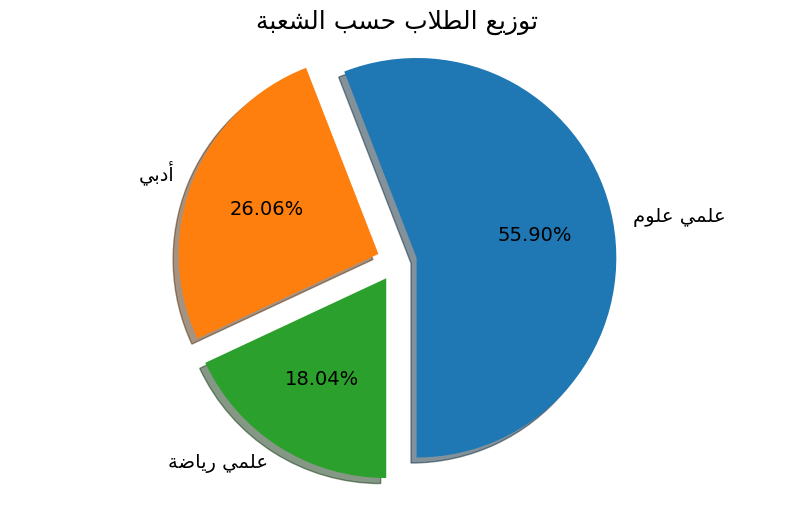

In [ ]:
labels = [
    get_display(arabic_reshaper.reshape(label)) for label in category_counts.index
]
title = get_display(arabic_reshaper.reshape("توزيع الطلاب حسب الشعبة"))

plt.figure(figsize=(10, 6))
plt.pie(category_counts, explode=(0.1 , 0.1 , 0.1) , labels=labels,  autopct="%1.2f%%", startangle=270 , shadow=True , 
        textprops={'fontsize': 14})

plt.title(title  ,fontsize = 18)
plt.axis("equal")
plt.show()

In [ ]:
passed90_df = df[df["مجموع_الدرجات"] > 369]
section_counts = passed90_df["الشعبة"].value_counts()
number90_df = pd.DataFrame(
    {"الشعبة": section_counts.index, "عدد الطلبة فوق %90": section_counts.values}
)
number90_df

,الشعبة,عدد الطلبة فوق %90
0,علمي علوم,98
1,علمي رياضة,79
2,أدبي,7


In [ ]:
filtered_df = df[(df["مجموع_الدرجات"] > 328) & (df["مجموع_الدرجات"] <= 369)]
section_counts = filtered_df["الشعبة"].value_counts()
number80_90_df = pd.DataFrame(
    {"الشعبة": section_counts.index, " %العدد بين 80%و90 ": section_counts.values}
)
number80_90_df

,الشعبة,%العدد بين 80%و90
0,علمي علوم,580
1,أدبي,262
2,علمي رياضة,228


In [ ]:
filtered_df = df[(df["مجموع_الدرجات"] > 287) & (df["مجموع_الدرجات"] <= 328)]
section_counts = filtered_df["الشعبة"].value_counts()
number70_80_df = pd.DataFrame(
    {"الشعبة": section_counts.index, " %العدد بين 70%و80 ": section_counts.values}
)
number70_80_df

,الشعبة,%العدد بين 70%و80
0,علمي علوم,493
1,أدبي,329
2,علمي رياضة,125


In [ ]:
filtered_df = df[(df["مجموع_الدرجات"] > 246) & (df["مجموع_الدرجات"] <= 287)]
section_counts = filtered_df["الشعبة"].value_counts()
number60_70_df = pd.DataFrame(
    {"الشعبة": section_counts.index, " %العدد بين 60%و70 ": section_counts.values}
)
number60_70_df

,الشعبة,%العدد بين 60%و70
0,علمي علوم,325
1,أدبي,125
2,علمي رياضة,73


In [ ]:
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

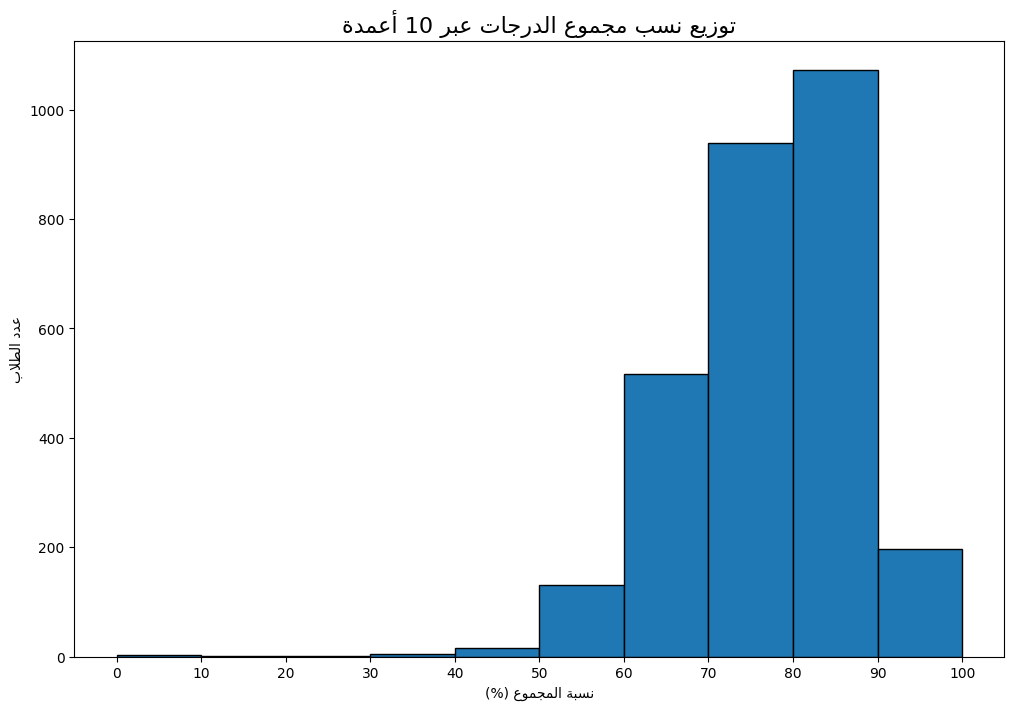

In [ ]:
df = pd.read_csv("Thanawya(2).csv")
total_score = 410

df["نسبة_المجموع"] = (df["مجموع_الدرجات "] / total_score) * 100


plt.figure(figsize=(12, 8))

plt.hist(df["نسبة_المجموع"], bins=range(0, 101, 10), edgecolor="black")

plt.xlabel(fix_arabic_text("نسبة المجموع (%)"))
plt.ylabel(fix_arabic_text("عدد الطلاب"))
plt.title(fix_arabic_text("توزيع نسب مجموع الدرجات عبر 10 أعمدة") , fontsize = 16)
plt.xticks(range(0, 101, 10))
plt.show()

In [ ]:
df_sorted = df.sort_values(by='مجموع_الدرجات ', ascending=False)
top_students = df_sorted.head(10)
var1 = top_students[['رقم_الجلوس', 'الأسم', 'المدرسة ','مجموع_الدرجات ']].reset_index(drop= True)
var1.index = var1.index +1
var1 

,رقم_الجلوس,الأسم,المدرسة,مجموع_الدرجات
1,806276,يمنى محمد محمود محمد الديوى,6 اكتوبر الثانوية,396.5
2,807336,زياد محمد محمد عبد الوهاب محمود,بور سعيد الثانوية بنين العسكرية,395.5
3,808336,مريم محمد السعيد عبد الحميد شقرف,بورسعيد الثانوية بنات,394
4,807061,أمجد جابر جابر جابر حسن السخرى,بور سعيد الثانوية بنين العسكرية,393.5
5,807337,سيف اشرف محمد عمار مهران,بور سعيد الثانوية بنين العسكرية,392.5
6,807349,عمار عطيه صلاح عطيه عطيه الخولى,بور سعيد الثانوية بنين العسكرية,392
7,807448,زياد ياسر ابراهيم السعيد محمد بركه,بور سعيد الثانوية بنين العسكرية,392
8,808335,مريم محمد ابراهيم محمود الرشيدي,بورسعيد الثانوية بنات,391
9,807541,ياسين محمود جلال محمود الجندى,بور سعيد الثانوية بنين العسكرية,391
10,807338,سيف مدحت سمير محمد علي خضير,بور سعيد الثانوية بنين العسكرية,391


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# import pandas as pd

# df = pd.read_csv("Thanawya(2).csv")

# df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors="coerce")

failure_conditions = {
    "اللغة_العربية": 40,
    "اللغة_الأجنبية_الأولى": 25,
    "اللغة_الأجنبية_الثانية": 20,
    "الرياضيات_البحتة": 30,
    "الرياضيات_التطبيقية": 30,
    "التاريخ": 30,
    "الجغرافيا": 30,
    "الفلسفة_والمنطق": 30,
    "علم_النفس_والاجتماع": 30,
    "الكيمياء": 30,
    "الأحياء": 30,
    "الجيولوجيا_وعلوم_البيئة": 30,
    "الفيزياء": 30,
}


failures = {}
for subject, threshold in failure_conditions.items():
    failures[subject] = (df[subject] < threshold).sum()

failures_df = pd.DataFrame(list(failures.items()), columns=["المادة", "عدد الراسبين"])
failures_df

,المادة,عدد الراسبين
0,اللغة_العربية,7
1,اللغة_الأجنبية_الأولى,8
2,اللغة_الأجنبية_الثانية,3
3,الرياضيات_البحتة,5
4,الرياضيات_التطبيقية,7
5,التاريخ,0
6,الجغرافيا,4
7,الفلسفة_والمنطق,1
8,علم_النفس_والاجتماع,2
9,الكيمياء,13


In [ ]:
# import pandas as pd

# قراءة البيانات من ملف CSV
df = pd.read_csv("Thanawya(2).csv")

# إزالة المسافات الزائدة من أسماء الأعمدة
df.columns = df.columns.str.strip()


df["مجموع_الدرجات"] = pd.to_numeric(df["مجموع_الدرجات"], errors="coerce")

adabi_students = df[df["الشعبة"] == "أدبي"]

top_10_adabi = adabi_students.nlargest(10, "مجموع_الدرجات")
top_10_adabi['مجموع_الدرجات'] = top_10_adabi['مجموع_الدرجات']
top_10_adabi[["رقم_الجلوس", "الأسم", "مجموع_الدرجات"]]

,رقم_الجلوس,الأسم,مجموع_الدرجات
1426,806980,احمد ايمن عزت عبدالسلام حسونه,374
1369,806923,عبد الرحمن احمد حسن نصر حسنين,373.5
1434,806988,باسم فوزى فتح الله ضيف معوض,373
775,806299,سما مصطفى محمود محمود سعد,372.5
1422,806976,يوسف محمد سامى حسن أحمد دياب,372.5
2091,807664,جنى محمود ابراهيم الحسينى محمد,370.5
2092,807665,جنى ممدوح حسين احمد العباسي,370.5
426,805937,مى محمد حمدى زكى العموشى,369
1368,806922,عبد الحميد احمد محمد عيد على طه,369
2221,807799,فرح احمد عبد الرحمن محمد بركات,369


In [ ]:
df["مجموع_الدرجات"] = pd.to_numeric(df["مجموع_الدرجات"], errors="coerce")
ryada_students = df[df["الشعبة"] == "علمي رياضة"]
top_10_Ryada = ryada_students.nlargest(10, "مجموع_الدرجات")
top_10_Ryada[["رقم_الجلوس", "الأسم", "مجموع_الدرجات"]].reset_index(drop=True)

,رقم_الجلوس,الأسم,مجموع_الدرجات
0,806276,يمنى محمد محمود محمد الديوى,396.5
1,808336,مريم محمد السعيد عبد الحميد شقرف,394
2,807448,زياد ياسر ابراهيم السعيد محمد بركه,392
3,807541,ياسين محمود جلال محمود الجندى,391
4,808335,مريم محمد ابراهيم محمود الرشيدي,391
5,807558,يوسف محمد محمد عبد العزيز عبد الرحمن,390.5
6,807606,محمد محمد بهجت ابراهيم النشار,390.5
7,807607,محمد محمد حامد عبد الرحمن الشويخ,390.5
8,808325,عائشة معتز محمد على بقشيش,390
9,807568,احمد محمد السيد ابراهيم الشبكى,388.5


In [ ]:
df["مجموع_الدرجات"] = pd.to_numeric(df["مجموع_الدرجات"], errors="coerce")
Oloom_students = df[df["الشعبة"] == "علمي علوم"]
top_10_Oloom = Oloom_students.nlargest(10, "مجموع_الدرجات")
top_10_Oloom['مجموع_الدرجات'] = top_10_Oloom['مجموع_الدرجات']
top_10_Oloom[["رقم_الجلوس", "الأسم", "مجموع_الدرجات"]].reset_index(drop=True)

,رقم_الجلوس,الأسم,مجموع_الدرجات
0,807336,زياد محمد محمد عبد الوهاب محمود,395.5
1,807061,أمجد جابر جابر جابر حسن السخرى,393.5
2,807337,سيف اشرف محمد عمار مهران,392.5
3,807349,عمار عطيه صلاح عطيه عطيه الخولى,392
4,807338,سيف مدحت سمير محمد علي خضير,391
5,808160,رؤى محمد عبد الله ابو عاشور حمدالله,390.5
6,807111,عبد الرحمن السيد ابراهيم منصور ابراهيم,390
7,806400,ملك محمد محمود اسماعيل ابراهيم عباس,389
8,806438,روان اسامه السيد ابراهيم حسن,388.5
9,806727,فاطمه الزهراء حازم محمد محمد عبد الوهاب الباز,388


In [ ]:
for col in Subjects:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

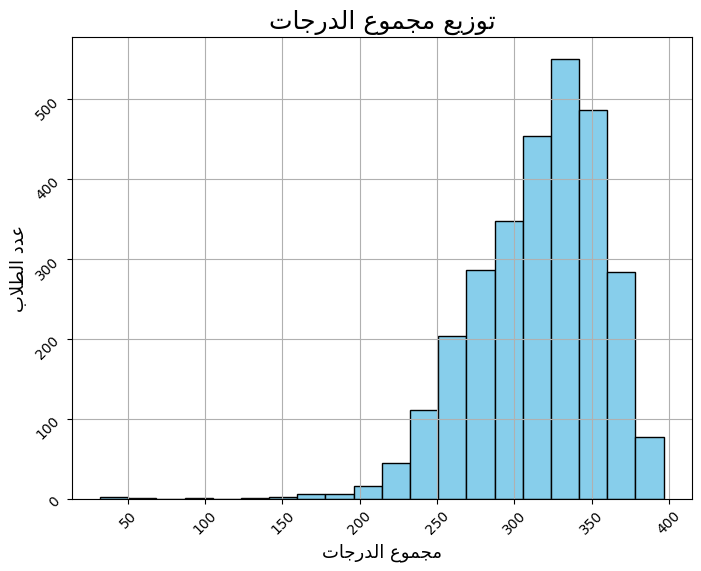

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["مجموع_الدرجات"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title(fix_arabic_text("توزيع مجموع الدرجات"), fontsize=18)
plt.xlabel(fix_arabic_text("مجموع الدرجات"), fontsize=13)
plt.ylabel(fix_arabic_text("عدد الطلاب"), fontsize=13)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

C:\Users\besha\AppData\Local\Temp\ipykernel_3172\1023439326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='الشعبة', data=df, palette='viridis')


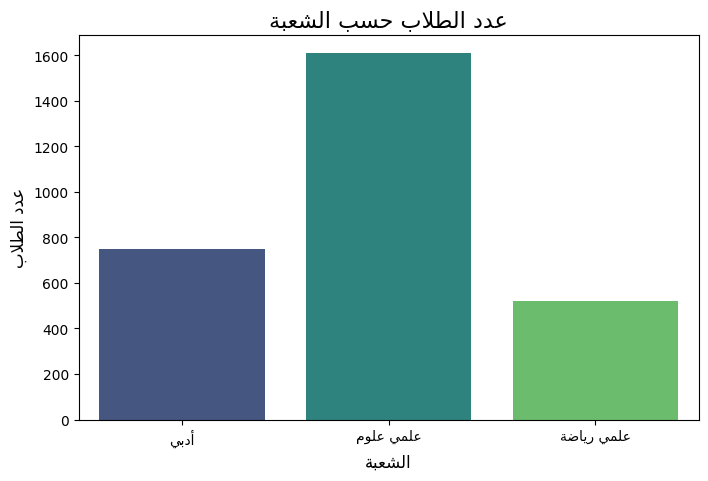

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='الشعبة', data=df, palette='viridis')
plt.title(fix_arabic_text('عدد الطلاب حسب الشعبة'), fontsize=16)
plt.xlabel(fix_arabic_text('الشعبة'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الطلاب'), fontsize=12)
plt.xticks(ticks=range(len(df['الشعبة'].unique())), labels=[fix_arabic_text(txt) for txt in df['الشعبة'].unique()])
plt.show()

C:\Users\besha\AppData\Local\Temp\ipykernel_3172\919373327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="الشعبة", y="مجموع_الدرجات", data=df, palette="coolwarm")


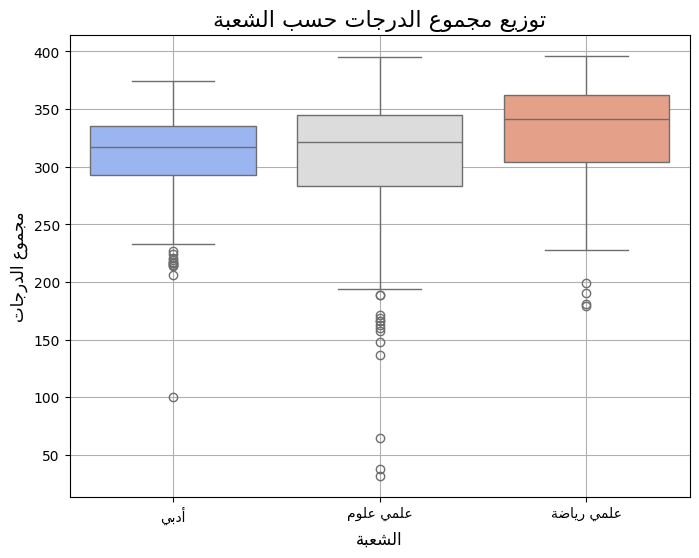

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="الشعبة", y="مجموع_الدرجات", data=df, palette="coolwarm")
plt.title(fix_arabic_text("توزيع مجموع الدرجات حسب الشعبة"), fontsize=16)
plt.xlabel(fix_arabic_text("الشعبة"), fontsize=12)
plt.ylabel(fix_arabic_text("مجموع الدرجات"), fontsize=12)
plt.xticks(
    ticks=range(len(df["الشعبة"].unique())),
    labels=[fix_arabic_text(txt) for txt in df["الشعبة"].unique()],
)
plt.grid(True)
plt.show()

C:\Users\besha\AppData\Local\Temp\ipykernel_3172\294140053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="الشعبة", y="اللغة_العربية", data=df, palette="Blues")


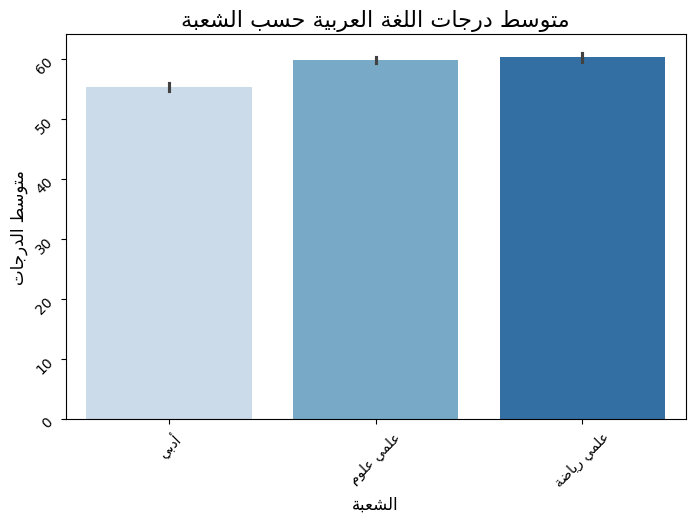

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="الشعبة", y="اللغة_العربية", data=df, palette="Blues")
plt.title(fix_arabic_text("متوسط درجات اللغة العربية حسب الشعبة"), fontsize=16)
plt.xlabel(fix_arabic_text("الشعبة"), fontsize=12)
plt.ylabel(fix_arabic_text("متوسط الدرجات"), fontsize=12)
plt.xticks(
    ticks=range(len(df["الشعبة"].unique())),
    labels=[fix_arabic_text(txt) for txt in df["الشعبة"].unique()],
)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

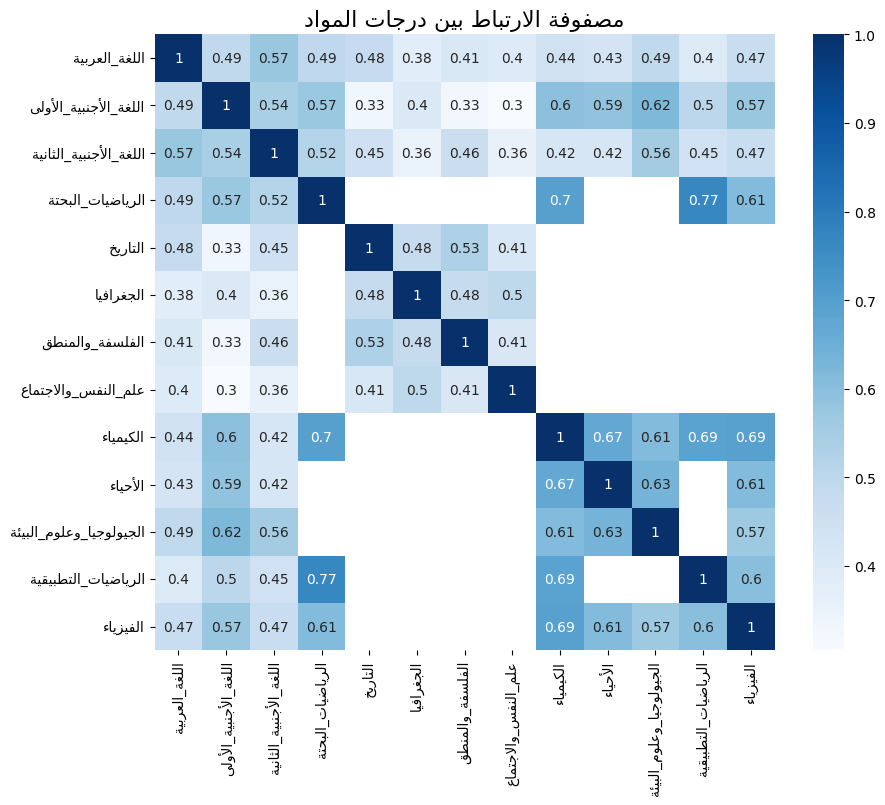

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df[Subjects].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="Blues",
    xticklabels=[fix_arabic_text(col) for col in corr_matrix.columns],
    yticklabels=[fix_arabic_text(col) for col in corr_matrix.index],
)
plt.title(fix_arabic_text("مصفوفة الارتباط بين درجات المواد"), fontsize=16)
plt.show()

C:\Users\besha\AppData\Local\Temp\ipykernel_3172\2811876483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=[fix_arabic_text(col) for col in avg_scores.index], palette='viridis')


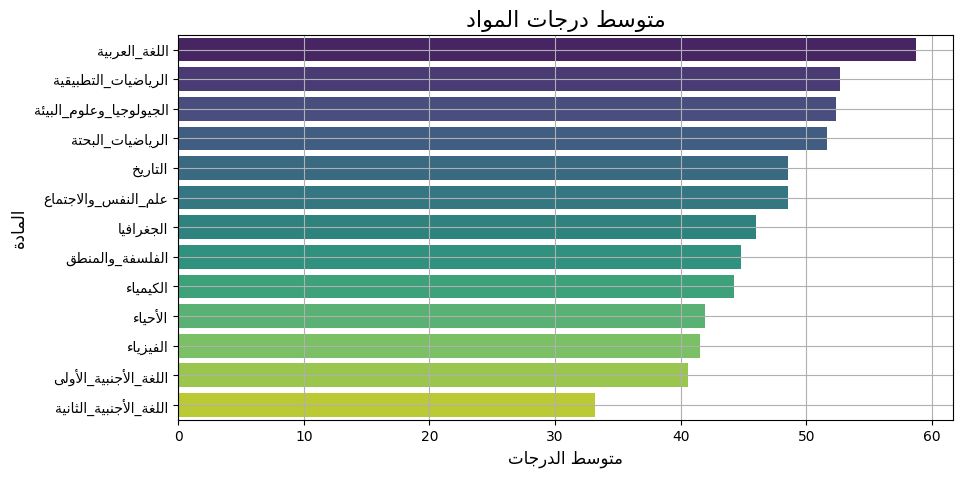

In [ ]:
avg_scores = df[Subjects].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_scores.values, y=[fix_arabic_text(col) for col in avg_scores.index], palette='viridis')
plt.title(fix_arabic_text('متوسط درجات المواد'), fontsize=16)
plt.xlabel(fix_arabic_text('متوسط الدرجات'), fontsize=12)
plt.ylabel(fix_arabic_text('المادة'), fontsize=12)
plt.grid(True)
plt.show()

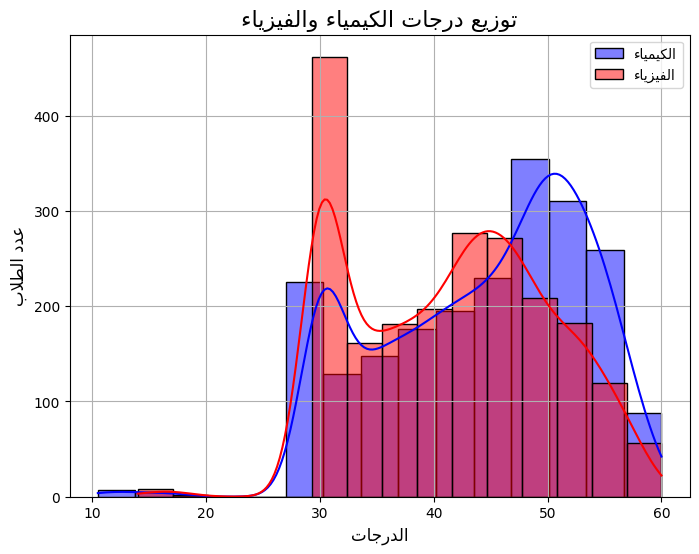

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['الكيمياء'].dropna(), bins=15, kde=True, color='blue', label=fix_arabic_text('الكيمياء'))
sns.histplot(df['الفيزياء'].dropna(), bins=15, kde=True, color='red', label=fix_arabic_text('الفيزياء'))
plt.title(fix_arabic_text('توزيع درجات الكيمياء والفيزياء'), fontsize=16)
plt.xlabel(fix_arabic_text('الدرجات'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الطلاب'), fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\besha\AppData\Local\Temp\ipykernel_3172\3563109771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='الشعبة', y='اللغة_الأجنبية_الثانية', data=df, palette='Blues')


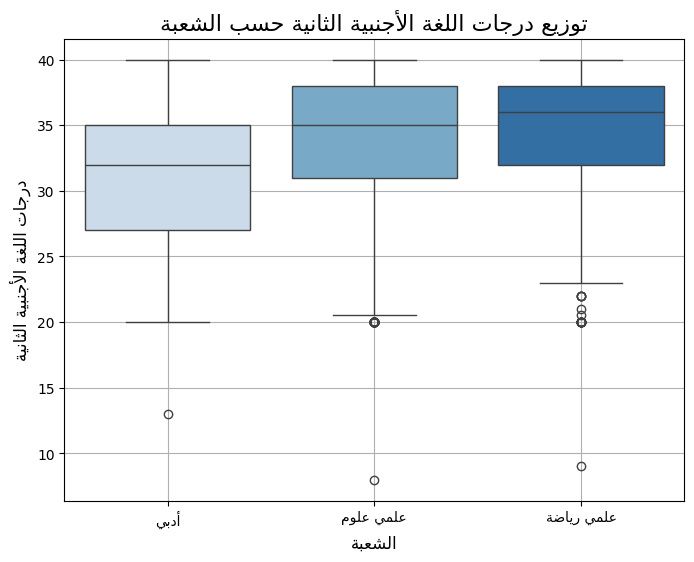

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='الشعبة', y='اللغة_الأجنبية_الثانية', data=df, palette='Blues')
plt.title(fix_arabic_text('توزيع درجات اللغة الأجنبية الثانية حسب الشعبة'), fontsize=16)
plt.xlabel(fix_arabic_text('الشعبة'), fontsize=12)
plt.ylabel(fix_arabic_text('درجات اللغة الأجنبية الثانية'), fontsize=12)
plt.xticks(ticks=range(len(df['الشعبة'].unique())), labels=[fix_arabic_text(txt) for txt in df['الشعبة'].unique()])
plt.grid(True)
plt.show()

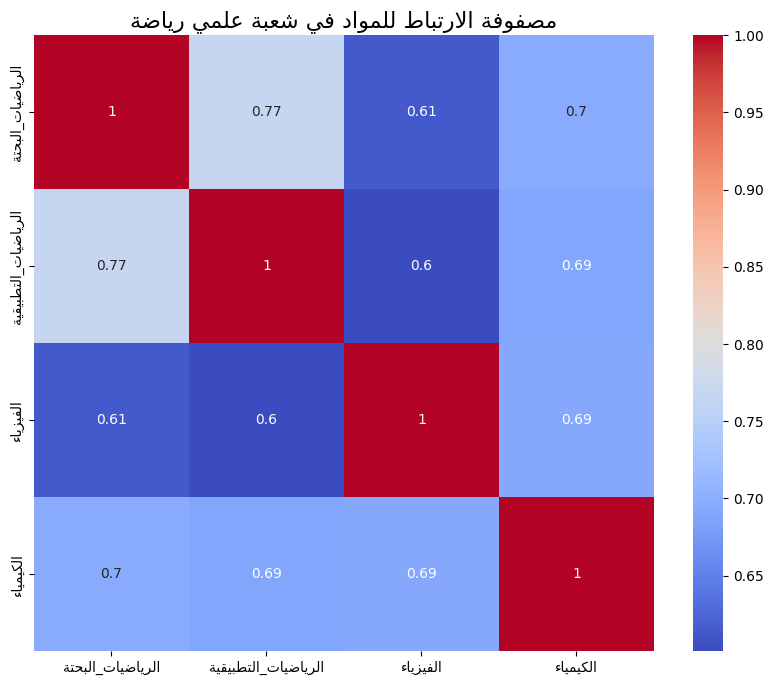

In [ ]:
plt.figure(figsize=(10, 8))
علمي_رياضة_مواد = ['الرياضيات_البحتة', 'الرياضيات_التطبيقية', 'الفيزياء', 'الكيمياء']
corr_matrix_علمي_رياضة = df[علمي_رياضة_مواد].corr()
sns.heatmap(corr_matrix_علمي_رياضة, annot=True, cmap='coolwarm', xticklabels=[fix_arabic_text(col) for col in corr_matrix_علمي_رياضة.columns], 
            yticklabels=[fix_arabic_text(col) for col in corr_matrix_علمي_رياضة.index])
plt.title(fix_arabic_text('مصفوفة الارتباط للمواد في شعبة علمي رياضة'), fontsize=16)
plt.show()

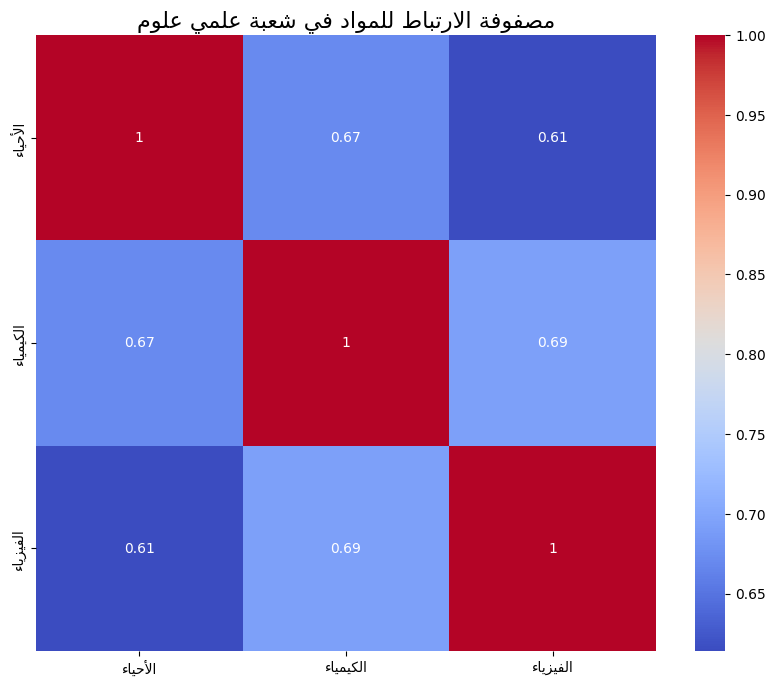

In [ ]:
plt.figure(figsize=(10, 8))
علمي_علوم_مواد = ['الأحياء', 'الكيمياء', 'الفيزياء']
corr_matrix_علمي_علوم = df[علمي_علوم_مواد].corr()
sns.heatmap(corr_matrix_علمي_علوم, annot=True, cmap='coolwarm', xticklabels=[fix_arabic_text(col) for col in corr_matrix_علمي_علوم.columns], 
            yticklabels=[fix_arabic_text(col) for col in corr_matrix_علمي_علوم.index])
plt.title(fix_arabic_text('مصفوفة الارتباط للمواد في شعبة علمي علوم'), fontsize=16)
plt.show()

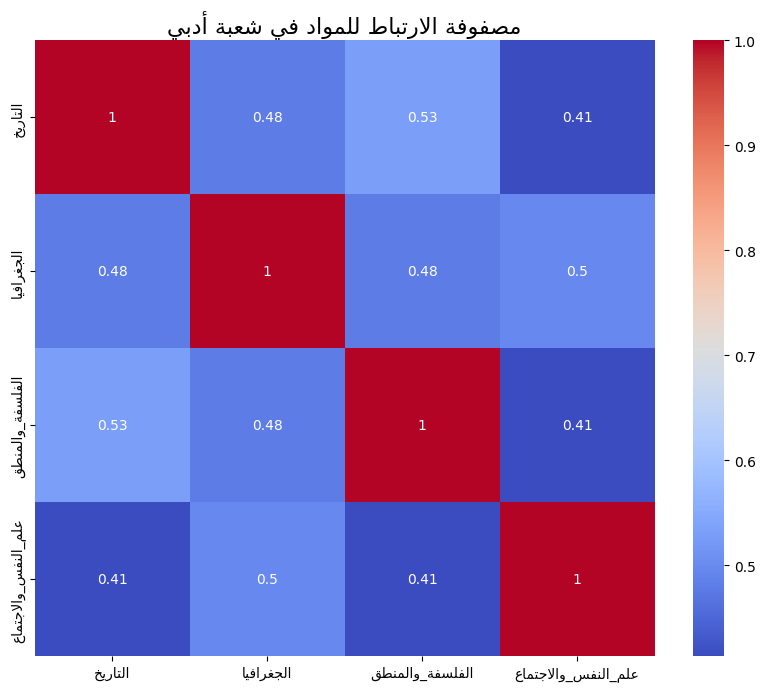

In [ ]:
plt.figure(figsize=(10, 8))
أدبي_مواد = ['التاريخ', 'الجغرافيا', 'الفلسفة_والمنطق', 'علم_النفس_والاجتماع']
corr_matrix_أدبي = df[أدبي_مواد].corr()
sns.heatmap(corr_matrix_أدبي, annot=True, cmap='coolwarm', xticklabels=[fix_arabic_text(col) for col in corr_matrix_أدبي.columns], 
            yticklabels=[fix_arabic_text(col) for col in corr_matrix_أدبي.index])
plt.title(fix_arabic_text('مصفوفة الارتباط للمواد في شعبة أدبي'), fontsize=16)
plt.show()